In [1]:
#Importing Libraries

In [5]:
import seaborn as sns   # To use Seaborn functions

In [6]:
import matplotlib.pyplot as plt    # This imports the pyplot module from the matplotlib package and assigns it the alias plt for convenience. Once imported you can use plt to draw the plots.

In [8]:
%matplotlib inline     

In [9]:
import pandas as pd    # In order to import and use the pandas library 

In [10]:
sns.set() #

In [11]:
import numpy as np   #the code tells Python to bring the NumPy library into your current environment.

In [12]:
from sklearn.preprocessing import StandardScaler    # to transform input dataset values.

In [13]:
from sklearn.model_selection import train_test_split   # To splitting data arrays into two subsets: for training data and for testing data

In [14]:
from sklearn.metrics import classification_report, confusion_matrix     #Compute confusion matrix to evaluate the accuracy of a classification.

In [15]:
df = pd.read_csv('heart.csv') #T import dataset

In [16]:
df.head()  #To show header of dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.info()  #To show information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.isnull()    #To check whether if any value is null

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()    #It gives you pandas series of column names along with the sum of missing values in each column.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [20]:
df_copy = df.copy(deep=True)    # To create a shallow copy of Pandas DataFrame

In [21]:
df_copy[['trtbps','chol','thalachh','oldpeak']] = df_copy[['trtbps','chol','thalachh','oldpeak']].replace(0,np.NAN)

In [22]:
print(df_copy.isnull().sum())   #To find the total number of missing value

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak     99
slp          0
caa          0
thall        0
output       0
dtype: int64


In [23]:
df_copy['oldpeak'].fillna(df_copy['oldpeak'].mean(), inplace = True) # To create a shallow copy of Pandas DataFrame

In [24]:
color_wheel = {1: "#0392cf",2:"#7bc043"}  #The short answer is determine the color of each dot in the scatter plot, role it into an array and pass it as the color argument.

In [25]:
colors = df["output"].map(lambda x:color_wheel.get(x + 1))

In [26]:
print(df.output.value_counts())   # to get the counts of unique values of the dataframe

1    165
0    138
Name: output, dtype: int64


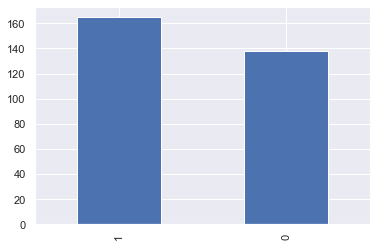

In [27]:
p=df.output.value_counts().plot(kind="bar")     # plot value_counts of Series

<AxesSubplot:>

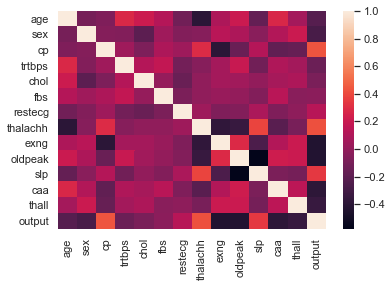

In [28]:
sns.heatmap(df.corr()) #To see the coreiation using heatmap

In [29]:
X = df.drop('output',axis=1)   # Remove the  column from the DataFrame
print(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [30]:
y = df['output']   # show output after dropping
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


In [31]:
#Splitting the data set into training and test data
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [33]:
#Fitting Decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
#Predicting the test set result
y_pred = dtree.predict(X_test)

In [37]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.67      0.90      0.77        31

    accuracy                           0.72        61
   macro avg       0.75      0.72      0.71        61
weighted avg       0.75      0.72      0.71        61



In [38]:
#creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Accuracy Score: 0.7213114754098361')

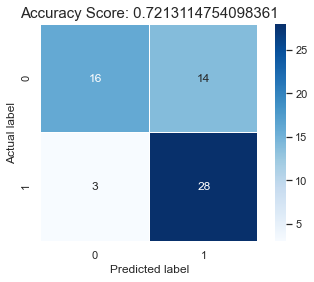

In [40]:
sns.heatmap(data=cm,linewidths= .5, annot=True, square=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

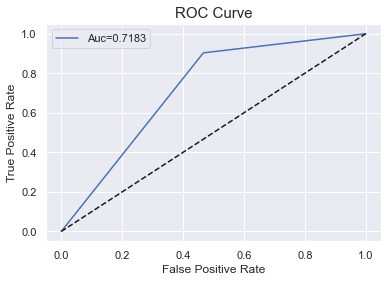

In [43]:
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index=y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr,tpr,label='Auc=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()



In [44]:
#fitting the svm classifier to the training set
from sklearn import svm
from sklearn.svm import SVC
svm = svm.SVC(kernel='linear',gamma='auto',probability=True)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))






Classification report - 
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



Text(0.5, 1.0, 'Accuracy Score: 0.7540983606557377')

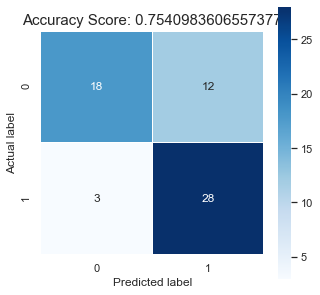

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths= .5, annot=True, square=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


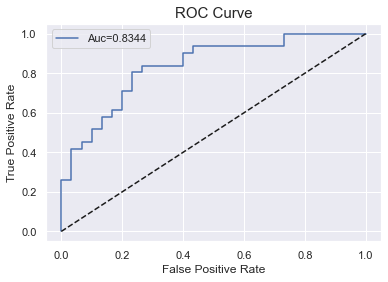

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = svm.predict_proba(X_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index=y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr,tpr,label='Auc=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()



In [47]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train ,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred = logreg.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



Text(0.5, 1.0, 'Accuracy Score: 0.7540983606557377')

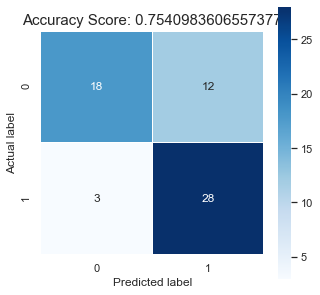

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths= .5, annot=True, square=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

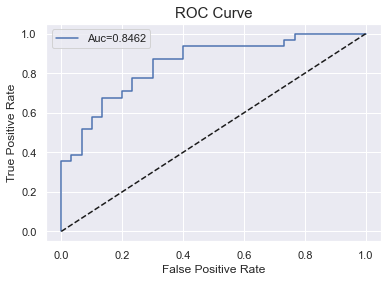

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = logreg.predict_proba(X_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index=y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr,tpr,label='Auc=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()


In [51]:
#fitting K-NN classifier to the training data
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))



Classification report - 
               precision    recall  f1-score   support

           0       0.60      0.30      0.40        30
           1       0.54      0.81      0.65        31

    accuracy                           0.56        61
   macro avg       0.57      0.55      0.52        61
weighted avg       0.57      0.56      0.53        61



Text(0.5, 1.0, 'Accuracy Score: 0.5573770491803278')

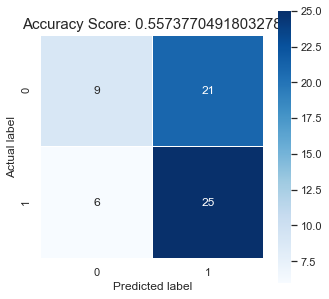

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths= .5, annot=True, square=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

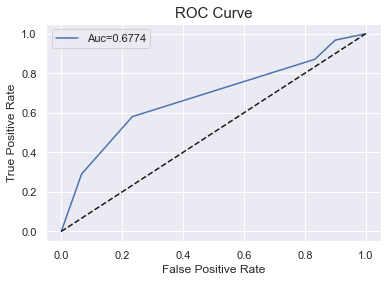

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = knn.predict_proba(X_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index=y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr,tpr,label='Auc=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()